#**🚓 ML Model For Car Prize Prediction 🚓**






## ***📌  Import Necessary Libraries***

In [ ]:
import pandas as pd
import numpy as np

#for graphical analysis
import matplotlib.pyplot as plt
import seaborn as sns

#for model training
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00



## ***📌  Data Ingestion***

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/CAR.csv")   #read dataset file using pandas
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


##***📌 Exploratory Data Analysis***

### 👉  Basic Inspection

In [ ]:
df.info()   #check dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
print(df.isnull().sum())   # Check missing values

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


⏫ no null value

In [ ]:
df.duplicated().sum()   # Check Duplicates

np.int64(763)

In [ ]:
df.drop_duplicates(inplace=True)   # Drop Duplicates

###👉 Value Count And Data Cleaning


In [ ]:
print(df.name.value_counts())   #no of cars

name
Maruti Swift Dzire VDI        54
Maruti Alto 800 LXI           48
Maruti Alto LXi               42
Maruti Alto LX                30
Maruti Swift VDI BSIV         28
                              ..
Tata Indica V2 DLS BSII        1
Mahindra XUV500 W10 AWD        1
Toyota Fortuner 2.7 2WD AT     1
Fiat Punto EVO 1.3 Emotion     1
Nissan Terrano XE 85 PS        1
Name: count, Length: 1491, dtype: int64


In [ ]:
df['name'] = df['name'].apply(lambda x: " ".join(x.split()[:2])) #separate car names
print(df.name.value_counts())

name
Maruti Swift          270
Maruti Alto           228
Maruti Wagon          139
Hyundai i20           113
Hyundai Verna         103
                     ... 
Audi RS7                1
Ambassador CLASSIC      1
Mercedes-Benz GLS       1
Volvo XC                1
Toyota Qualis           1
Name: count, Length: 189, dtype: int64


In [ ]:
df=df[df.groupby('name')['name'].transform('count')>30]    #remove <30 cars
print(df.name.value_counts())   #car name (>30 cars)

name
Maruti Swift        270
Maruti Alto         228
Maruti Wagon        139
Hyundai i20         113
Hyundai Verna       103
Toyota Innova        89
Tata Indica          86
Mahindra Scorpio     85
Hyundai Santro       84
Ford Figo            80
Honda City           80
Hyundai EON          77
Hyundai Grand        75
Mahindra XUV500      64
Hyundai i10          60
Mahindra Bolero      59
Chevrolet Beat       56
Renault KWID         55
Maruti 800           51
Maruti Ertiga        51
Maruti Zen           51
Tata Indigo          50
Honda Amaze          46
Maruti Baleno        43
Toyota Etios         41
Renault Duster       37
Volkswagen Polo      36
Volkswagen Vento     35
Maruti Ciaz          34
Maruti Ritz          34
Hyundai Creta        33
Mahindra Xylo        33
Ford Ecosport        31
Name: count, dtype: int64


In [ ]:
print(df.year.value_counts())    #car years

year
2015    236
2014    235
2012    232
2013    214
2017    210
2016    192
2011    174
2018    173
2010    137
2009    119
2008     92
2019     88
2007     79
2006     61
2005     41
2020     30
2004     30
2003     20
2001     12
2002     11
2000      9
1998      6
1999      6
1992      1
1997      1
Name: count, dtype: int64


In [ ]:
print(df.fuel.value_counts())   #car fuel

fuel
Petrol    1214
Diesel    1154
CNG         22
LPG         19
Name: count, dtype: int64


In [ ]:
print(df.seller_type.value_counts())    #car seller type

seller_type
Individual          1944
Dealer               443
Trustmark Dealer      22
Name: count, dtype: int64


### 👉 Charts

####***Cars per company 🔽***

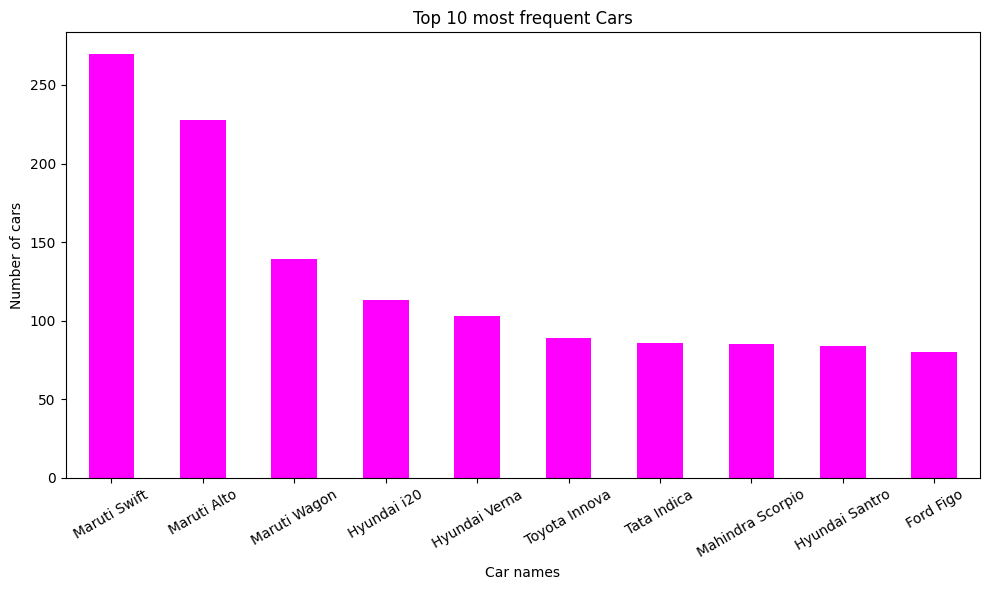

In [ ]:
top_10_cars = df.name.value_counts().head(10)
plt.figure(figsize=(10,6))
top_10_cars.plot(kind= 'bar',color = 'magenta')
plt.xlabel("Car names")
plt.ylabel("Number of cars")
plt.title("Top 10 most frequent Cars")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

####***📋 Car production in last three years 🔽 (2019,2018,2017)***

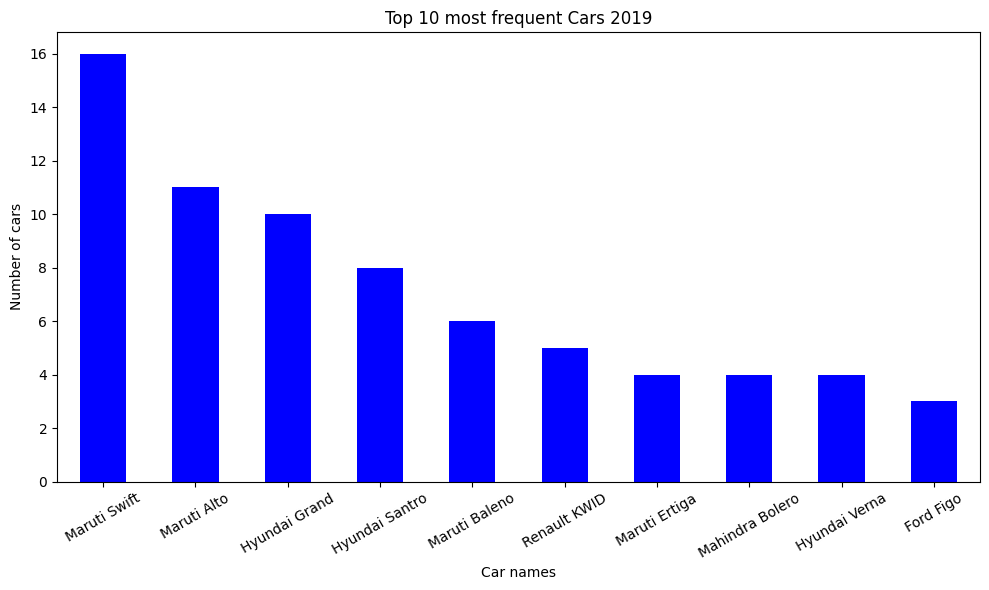

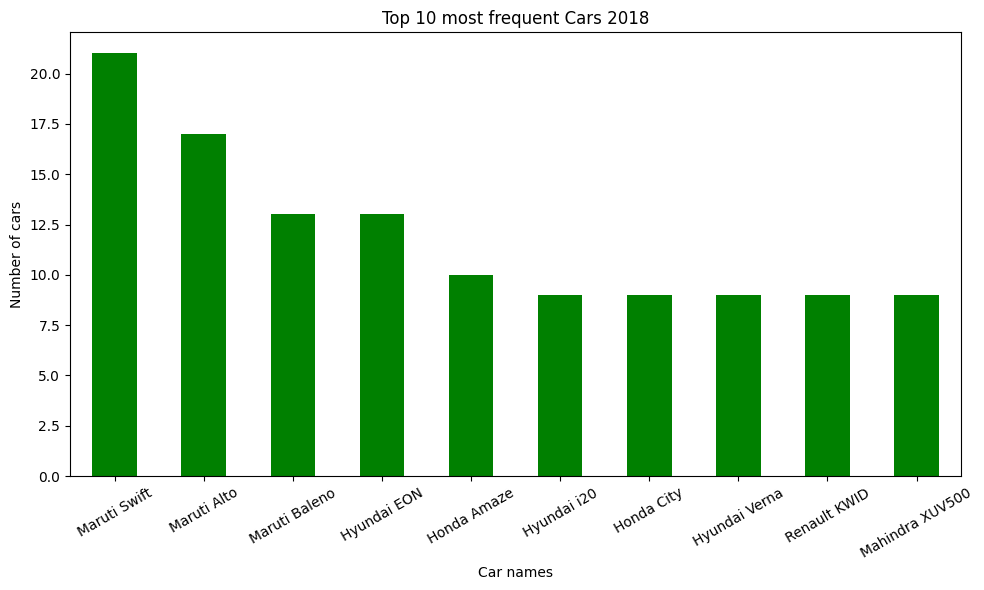

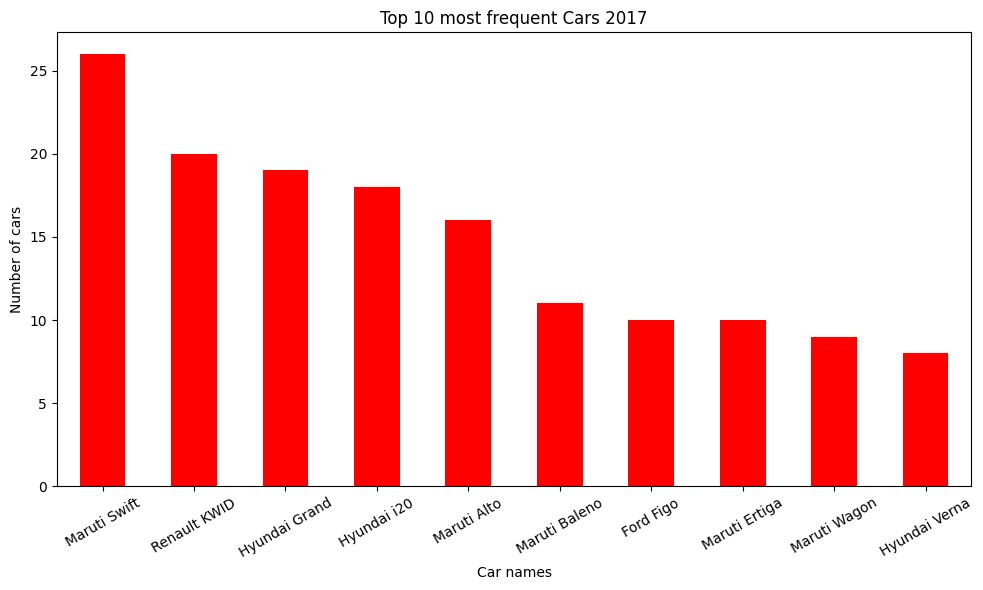

In [ ]:
#Top cars in 2019

top_10_2019 = (df[df.year==2019].name.value_counts().head(10))
plt.figure(figsize=(10,6))
top_10_2019.plot(kind= 'bar',color = 'blue')
plt.xlabel("Car names")
plt.ylabel("Number of cars")
plt.title("Top 10 most frequent Cars 2019")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#Top cars in 2018
top_10_2018 = (df[df.year==2018].name.value_counts().head(10))
plt.figure(figsize=(10,6))
top_10_2018.plot(kind= 'bar',color = 'green')
plt.xlabel("Car names")
plt.ylabel("Number of cars")
plt.title("Top 10 most frequent Cars 2018")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#Top cars in 2017
top_10_2017 = (df[df.year==2017].name.value_counts().head(10))
plt.figure(figsize=(10,6))
top_10_2017.plot(kind= 'bar',color = 'red')
plt.xlabel("Car names")
plt.ylabel("Number of cars")
plt.title("Top 10 most frequent Cars 2017")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


#### ***💰 Selling price per year 🔽***

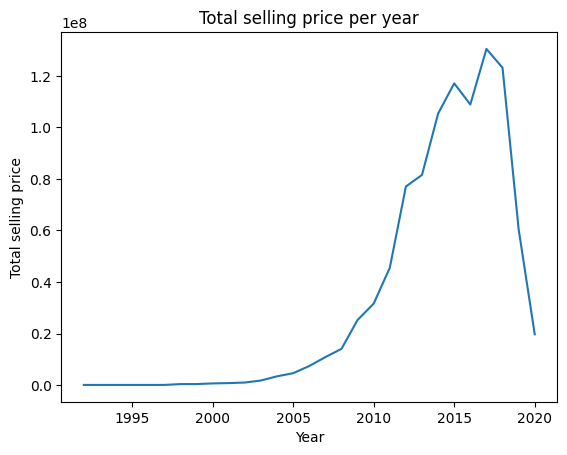

In [ ]:
#Total selling price per year
y = (df.groupby('year').selling_price.sum().values)
x = (df.groupby('year').selling_price.sum().index)
plt.title("Total selling price per year")
plt.xlabel("Year")
plt.ylabel("Total selling price")
plt.plot(x,y)

#### ***⛽ Fuel types 🔽***

<BarContainer object of 4 artists>

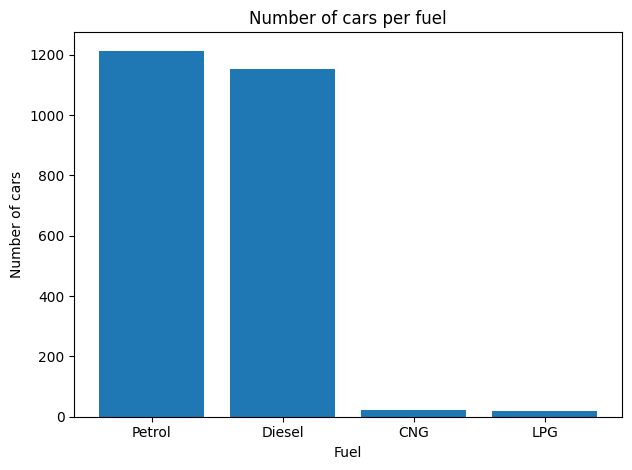

In [ ]:
#chart for fuel
x = (df.fuel.value_counts().index)
y = (df.fuel.value_counts().values)
plt.xlabel("Fuel")
plt.ylabel("Number of cars")
plt.title("Number of cars per fuel")
plt.tight_layout()
plt.bar(x,y)

<BarContainer object of 4 artists>

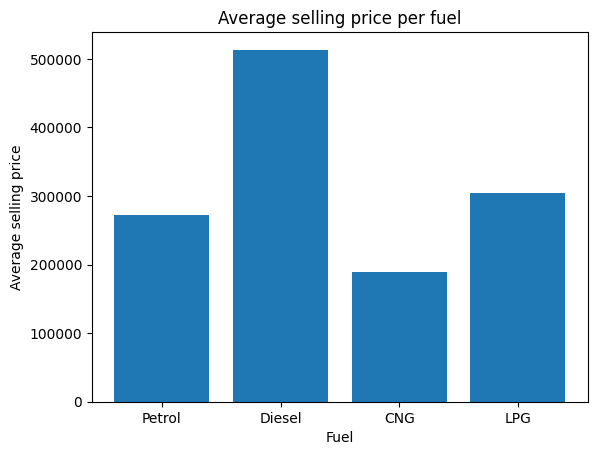

In [ ]:
#chart for types of fuel effect on selling price
x = (df.fuel.value_counts().index)
y = (df.groupby('fuel').selling_price.mean().values)
plt.xlabel("Fuel")
plt.ylabel("Average selling price")
plt.title("Average selling price per fuel")
plt.bar(x,y)

#### ***Seller type 🔽***

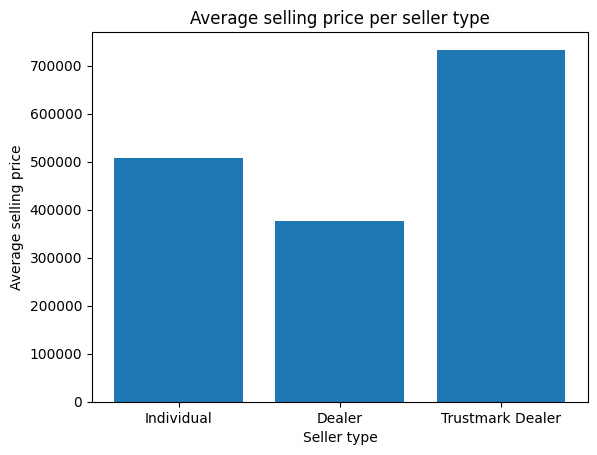

In [ ]:
#chart for seller type effect on selling price
x = (df.seller_type.value_counts().index)
y = (df.groupby('seller_type').selling_price.mean().values)
plt.bar(x,y)
plt.xlabel("Seller type")
plt.ylabel("Average selling price")
plt.title("Average selling price per seller type")
plt.show()

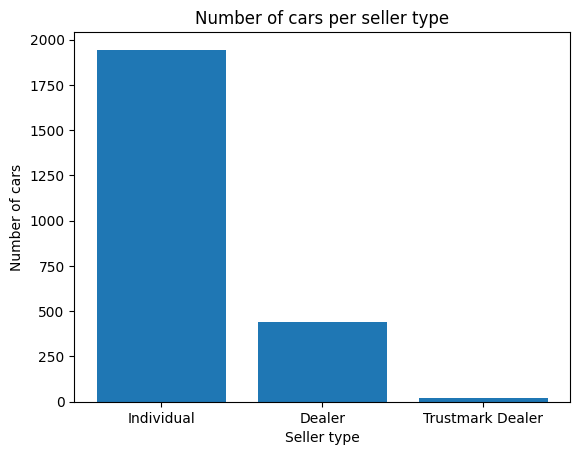

In [ ]:
#chart for seller type effect on production
x = (df.seller_type.value_counts().index)
y = (df.seller_type.value_counts().values)
plt.bar(x,y)
plt.xlabel("Seller type")
plt.ylabel("Number of cars")
plt.title("Number of cars per seller type")
plt.show()

#### ***▶ Transmission type 🔽***

In [ ]:
print(df.transmission.value_counts())    #car transmission

transmission
Manual       2289
Automatic     120
Name: count, dtype: int64


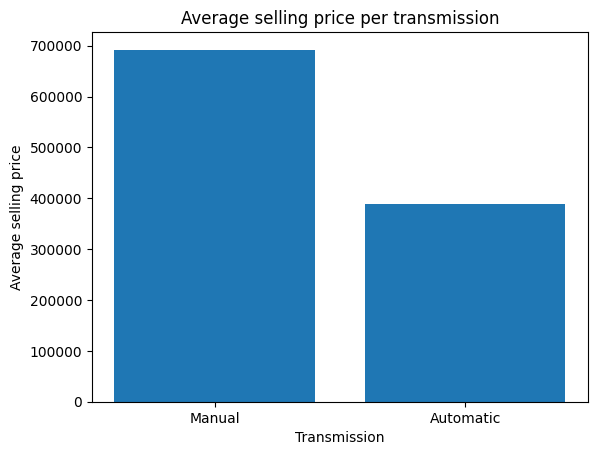

In [ ]:
#transmission effect on selling price
x = (df.transmission.value_counts().index)
y = (df.groupby('transmission').selling_price.mean().values)
plt.bar(x,y)
plt.xlabel("Transmission")
plt.ylabel("Average selling price")
plt.title("Average selling price per transmission")
plt.show()

#### ***▶ Owner type 🔽***

In [ ]:
print(df.owner.value_counts())    #car owner

owner
First Owner             1454
Second Owner             697
Third Owner              200
Fourth & Above Owner      48
Test Drive Car            10
Name: count, dtype: int64


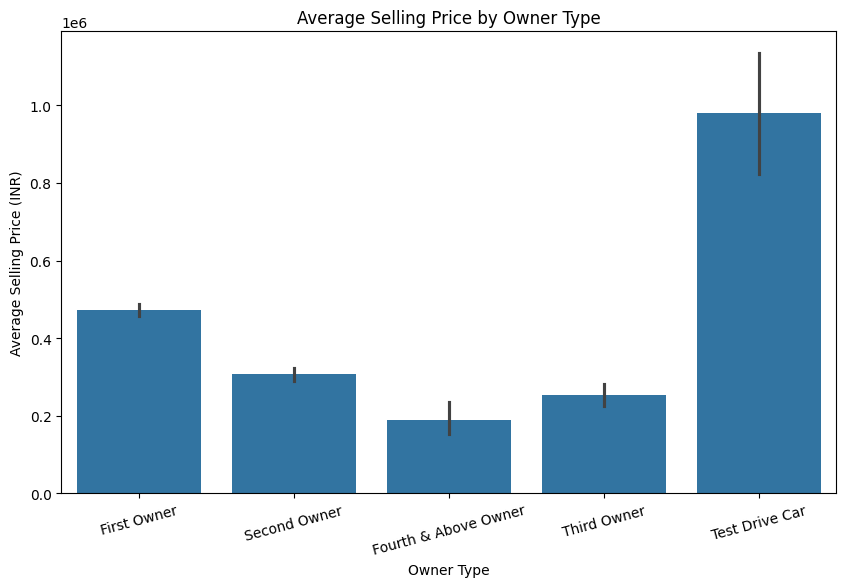

In [ ]:
# bar plot for avg selling price per owner type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="owner", y="selling_price", estimator='mean')

plt.title("Average Selling Price by Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("Average Selling Price (INR)")
plt.xticks(rotation=15)
plt.show()


##***📌 Preprocess the dataset***

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna,2012,600000,100000,Diesel,Individual,Manual,First Owner
4,Honda Amaze,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto,2007,140000,125000,Petrol,Individual,Manual,First Owner


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2409 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2409 non-null   object
 1   year           2409 non-null   int64 
 2   selling_price  2409 non-null   int64 
 3   km_driven      2409 non-null   int64 
 4   fuel           2409 non-null   object
 5   seller_type    2409 non-null   object
 6   transmission   2409 non-null   object
 7   owner          2409 non-null   object
dtypes: int64(3), object(5)
memory usage: 169.4+ KB


In [ ]:
print(df.head())
df.info()
df['car_age'] = 2025 - df['year']   #Add car age
df['km_driven'] = np.log1p(df['km_driven'])   #Log transform
df = df.drop(columns = ['year'])   #remove year column
df = df[df["selling_price"] < df["selling_price"].quantile(0.99)]
df.head()

            name  year  selling_price  km_driven    fuel seller_type  \
0     Maruti 800  2007          60000      70000  Petrol  Individual   
1   Maruti Wagon  2007         135000      50000  Petrol  Individual   
2  Hyundai Verna  2012         600000     100000  Diesel  Individual   
4    Honda Amaze  2014         450000     141000  Diesel  Individual   
5    Maruti Alto  2007         140000     125000  Petrol  Individual   

  transmission         owner  
0       Manual   First Owner  
1       Manual   First Owner  
2       Manual   First Owner  
4       Manual  Second Owner  
5       Manual   First Owner  
<class 'pandas.core.frame.DataFrame'>
Index: 2409 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2409 non-null   object
 1   year           2409 non-null   int64 
 2   selling_price  2409 non-null   int64 
 3   km_driven      2409 non-null   int64 
 4   fuel           24

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,Maruti 800,60000,11.156265,Petrol,Individual,Manual,First Owner,18
1,Maruti Wagon,135000,10.819798,Petrol,Individual,Manual,First Owner,18
2,Hyundai Verna,600000,11.512935,Diesel,Individual,Manual,First Owner,13
4,Honda Amaze,450000,11.856522,Diesel,Individual,Manual,Second Owner,11
5,Maruti Alto,140000,11.736077,Petrol,Individual,Manual,First Owner,18


In [ ]:
X = df.drop(columns = ['selling_price'])
Y = np.log1p(df[('selling_price')])   # Log transform selling_price

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 9)

##***📌 Model Training***


In [ ]:
df.sample()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
4069,Maruti Wagon,229999,10.126671,Petrol,Individual,Manual,First Owner,13


In [ ]:
#LinearRegression Model
step1 = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), ['name', 'fuel', 'seller_type', 'transmission','owner'])
    ,('stdsc', StandardScaler(), ['km_driven','car_age'])
], remainder='passthrough')
step2 = LinearRegression()
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
print("R2 Score : ",r2_score(Y_test,Y_pred))
print("RMSE     : ",root_mean_squared_error(Y_test,Y_pred))
print("MAE      : ",mean_absolute_error(Y_pred,Y_test))



R2 Score :  0.8923142224615108
RMSE     :  0.24260417825498112
MAE      :  0.18118884208483368


In [ ]:
# RandomForestRegressor Model
step1 = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), ['name', 'fuel', 'seller_type', 'transmission','owner'])
    ,('stdsc', StandardScaler(), ['km_driven','car_age'])
], remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=300, max_depth=15)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
print("R2 Score : ",r2_score(Y_test,Y_pred))
print("RMSE     : ",root_mean_squared_error(Y_test,Y_pred))
print("MAE      : ",mean_absolute_error(Y_pred,Y_test))

R2 Score :  0.8712252824514743
RMSE     :  0.2652982621557837
MAE      :  0.20939233528983467


In [ ]:
#XGBRegressor Model
step1 = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), ['name', 'fuel', 'seller_type', 'transmission','owner'])
    ,('stdsc', StandardScaler(), ['km_driven','car_age'])
], remainder='passthrough')
step2 = XGBRegressor()
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
print("R2 Score : ",r2_score(Y_test,Y_pred))
print("RMSE     : ",root_mean_squared_error(Y_test,Y_pred))
print("MAE      : ",mean_absolute_error(Y_pred,Y_test))

R2 Score :  0.8712259965800795
RMSE     :  0.26529752654034555
MAE      :  0.20604418754434403


In [ ]:
# Lasso Regressor Model
step1 = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), ['name', 'fuel', 'seller_type', 'transmission','owner'])
    ,('stdsc', StandardScaler(), ['km_driven','car_age'])
], remainder='passthrough')
step2 = Lasso(alpha= 0.0001)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
print("R2 Score : ",r2_score(Y_test,Y_pred))
print("RMSE     : ",root_mean_squared_error(Y_test,Y_pred))
print("MAE      : ",mean_absolute_error(Y_pred,Y_test))

R2 Score :  0.8922447907675722
RMSE     :  0.242682376625985
MAE      :  0.18094181728089367


In [ ]:
# Ridge Regressor Model
step1 = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), ['name', 'fuel', 'seller_type', 'transmission','owner'])
    ,('stdsc', StandardScaler(), ['km_driven','car_age'])
], remainder='passthrough')
step2 = Ridge(alpha = 0.009)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
print("R2 Score : ",r2_score(Y_test,Y_pred))
print("RMSE     : ",root_mean_squared_error(Y_test,Y_pred))
print("MAE      : ",mean_absolute_error(Y_pred,Y_test))

R2 Score :  0.8922977044500926
RMSE     :  0.2426227841703474
MAE      :  0.18123299631032427


In [ ]:
#AdaBoostRegressor Model
step1 = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), ['name', 'fuel', 'seller_type', 'transmission','owner'])
    ,('stdsc', StandardScaler(), ['km_driven','car_age'])
], remainder='passthrough')
step2 = AdaBoostRegressor(n_estimators=1000)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
print("R2 Score : ",r2_score(Y_test,Y_pred))
print("RMSE     : ",root_mean_squared_error(Y_test,Y_pred))
print("MAE      : ",mean_absolute_error(Y_pred,Y_test))

R2 Score :  0.715750748152733
RMSE     :  0.3941565675366685
MAE      :  0.32432817799287794


In [ ]:
# GradientBoostingRegressor Model
step1 = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), ['name', 'fuel', 'seller_type', 'transmission','owner'])
    ,('stdsc', StandardScaler(), ['km_driven','car_age'])
], remainder='passthrough')
step2 = GradientBoostingRegressor()
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
print("R2 Score : ",r2_score(Y_test,Y_pred))
print("RMSE     : ",root_mean_squared_error(Y_test,Y_pred))
print("MAE      : ",mean_absolute_error(Y_pred,Y_test))

R2 Score :  0.8647328339482722
RMSE     :  0.2719038129469238
MAE      :  0.21076454856483554


In [ ]:
# SVR Model
step1 = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), ['name', 'fuel', 'seller_type', 'transmission', 'owner'])
    ,('stdsc', StandardScaler(), ['km_driven','car_age'])
], remainder='passthrough')
step2 = SVR()
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
print("R2 Score : ",r2_score(Y_test,Y_pred))
print("RMSE     : ",root_mean_squared_error(Y_test,Y_pred))
print("MAE      : ",mean_absolute_error(Y_pred,Y_test))

R2 Score :  0.8875252975978393
RMSE     :  0.24793996097359156
MAE      :  0.1825423701095428


In [ ]:
# KNeighborsRegressor Model
step1 = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), ['name', 'fuel', 'seller_type', 'transmission','owner'])
    #,('ordinal', OrdinalEncoder(), ['owner'])
    ,('stdsc', StandardScaler(), ['km_driven','car_age'])
], remainder='passthrough')
step2 = KNeighborsRegressor(n_neighbors=6)
pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
print("R2 Score : ",r2_score(Y_test,Y_pred))
print("RMSE     : ",root_mean_squared_error(Y_test,Y_pred))
print("MAE      : ",mean_absolute_error(Y_pred,Y_test))

R2 Score :  0.8447676060824126
RMSE     :  0.29127974092459713
MAE      :  0.2241481745521708


##***📌 Streamlit***


In [ ]:
import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))
pickle.dump(df, open('df.pkl', 'wb'))

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import pickle

# Load saved pipeline and dataframe
pipe=pickle.load(open('pipe.pkl','rb'))
df=pickle.load(open('df.pkl','rb'))

st.title("Car Prize Prediction 🚓")

name = st.selectbox("Car Name", df['name'].unique())
year_df = pd.DataFrame({'year': df['car_age'].apply(lambda x: 2025 - x)})
year = st.slider("Year of Manufacture", int(year_df['year'].min()), int(year_df['year'].max()), int(year_df['year'].median()))
car_age = 2025-year
km_input = st.number_input("Kilometers Driven", min_value=0, value=60000)
km_log = np.log1p(km_input)
fuel = st.selectbox("Fuel Type", df['fuel'].unique())
seller_type = st.selectbox("Seller Type", df['seller_type'].unique())
transmission = st.selectbox("Transmission", df['transmission'].unique())
owner = st.selectbox("Owner Type", df['owner'].unique())

if st.button("Predict Price"):
    input_df = pd.DataFrame([[name,km_log, fuel, seller_type, transmission, owner,car_age]],
                            columns=['name','km_driven', 'fuel', 'seller_type', 'transmission', 'owner','car_age'])
    prediction = pipe.predict(input_df)
    st.subheader(f"Estimated Selling Price: ₹{round((np.expm1(prediction[0])), 2)}")


Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦

⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.229.98.129:8501

⠙⠹⠸⠼⠴⠦Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://poor-socks-argue.loca.lt
  Stopping...
^C


#📄 Project Summary: Car Price Prediction using ML

## Data Collection :
* Dataset: CAR.csv
* Loaded using pandas, with no missing values or major duplicates.

##Exploratory Data Analysis (EDA) :
* Visualized data using Seaborn and Matplotlib.
* Analyzed key factors like fuel type, year, seller type, transmission, and     owner type.

##Preprocessing :
* Applied encoders (OneHot, Ordinal) and scaling (StandardScaler).
* Used ColumnTransformer and Pipeline to streamline transformations.

##Model Training & Evaluation :
###Tried multiple regression models:
* Linear Regression, Lasso, Ridge
* Decision Tree, Random Forest
* Gradient Boosting, AdaBoost, XGBoost
* SVR, KNN
###Evaluated using R² Score, RMSE, and MAE.
###Best model selected based on highest accuracy and lowest error.

##Deployment :
* Integrated the final model using Streamlit.